# Average Directional Index (ADX)

-  Quantifies Trend Strength [0-100]
-  Shows if the Bulls/Bears are in control of the Market
-  Uses Minus Directional Indicator (-DI) and Plus Directional Indicator (+DI) 
-  Doesn't indicate Direction of the Market
> ADX > 25 - Strong Enough for Trend following Strategies<br>
> ADX < 25 - Accumulation Phase (Lack of Trend)<br>
> ADX > 25, +DI > -DI - Measures the strength of an Uptrend<br>
> ADX > 25, -DI > +DI - Measures the strength of a downtrend<br>
> ADX > 50 - Very Strong Trend<br>

-  Lagging indicator
-  False signals on shorter timeframes


In [14]:
import pandas as pd
from ta.trend import ADXIndicator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
ohlc = pd.read_csv("nifty.csv", parse_dates=["date"], index_col="date")

In [16]:
adx = ADXIndicator(ohlc.high,ohlc.low,ohlc.close, 14, False)
ohlc['plus_di'] = adx.adx_pos()
ohlc['minus_di'] = adx.adx_neg()
ohlc['adx'] = adx.adx()
ohlc.tail(10)

,open,high,low,close,plus_di,minus_di,adx
date,,,,,,,
2022-07-06,15818,16011,15801,15990,22.849787,25.400546,18.230636
2022-07-07,16114,16151,16046,16133,25.969531,24.164432,17.185630
2022-07-08,16274,16276,16158,16221,28.702429,23.089633,16.732169
2022-07-11,16221,16248,16116,16199,27.487078,23.459227,16.101733
2022-07-12,16126,16159,16031,16058,25.979322,24.947726,15.096297
2022-07-13,16128,16140,15950,15967,24.352377,26.055170,14.259280
2022-07-14,16019,16071,15858,15939,22.640614,27.259777,13.901957
2022-07-15,16011,16067,15927,16049,21.567524,25.967755,13.570158
2022-07-18,16151,16288,16142,16279,27.250436,23.886370,13.070758


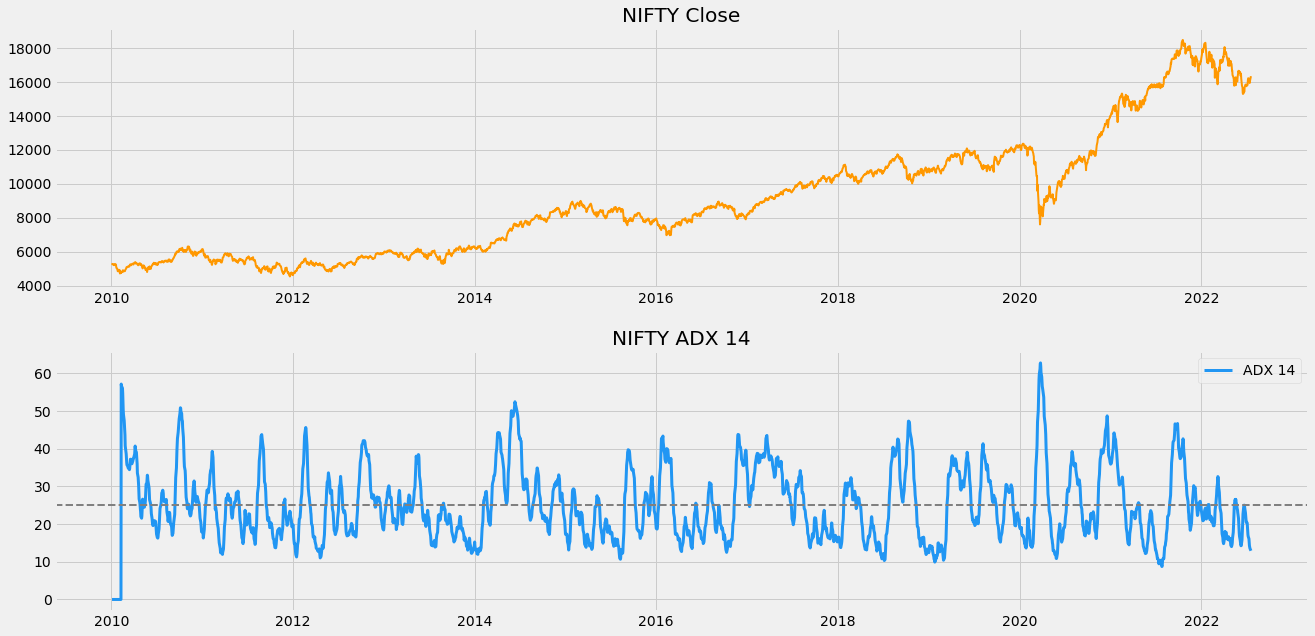

In [18]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(ohlc['close'], linewidth = 2, color = '#ff9800')
ax1.set_title('NIFTY Close')
#ax2.plot(ohlc['plus_di'], color = '#26a69a', label = '+ DI 14', linewidth = 3, alpha = 0.3)
#ax2.plot(ohlc['minus_di'], color = '#f44336', label = '- DI 14', linewidth = 3, alpha = 0.3)
ax2.plot(ohlc['adx'], color = '#2196f3', label = 'ADX 14', linewidth = 3)
ax2.axhline(25, color = 'grey', linewidth = 2, linestyle = '--')
ax2.legend()
ax2.set_title('NIFTY ADX 14')
plt.show()